<center><h1>Wong_Jonathan_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

Name: Jonathan Wong,
GitHub: jonathanwong150,
USC ID: 9171949586

### (a) Download Data

Package imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.linalg import inv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Get the Vertebral Column Data Set

In [6]:
# Reading column_2C.dat
data = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep=' ', names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'])

# Replace class labels with binary classification
data['class'] = data['class'].map({'NO': 0, 'AB': 1})

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

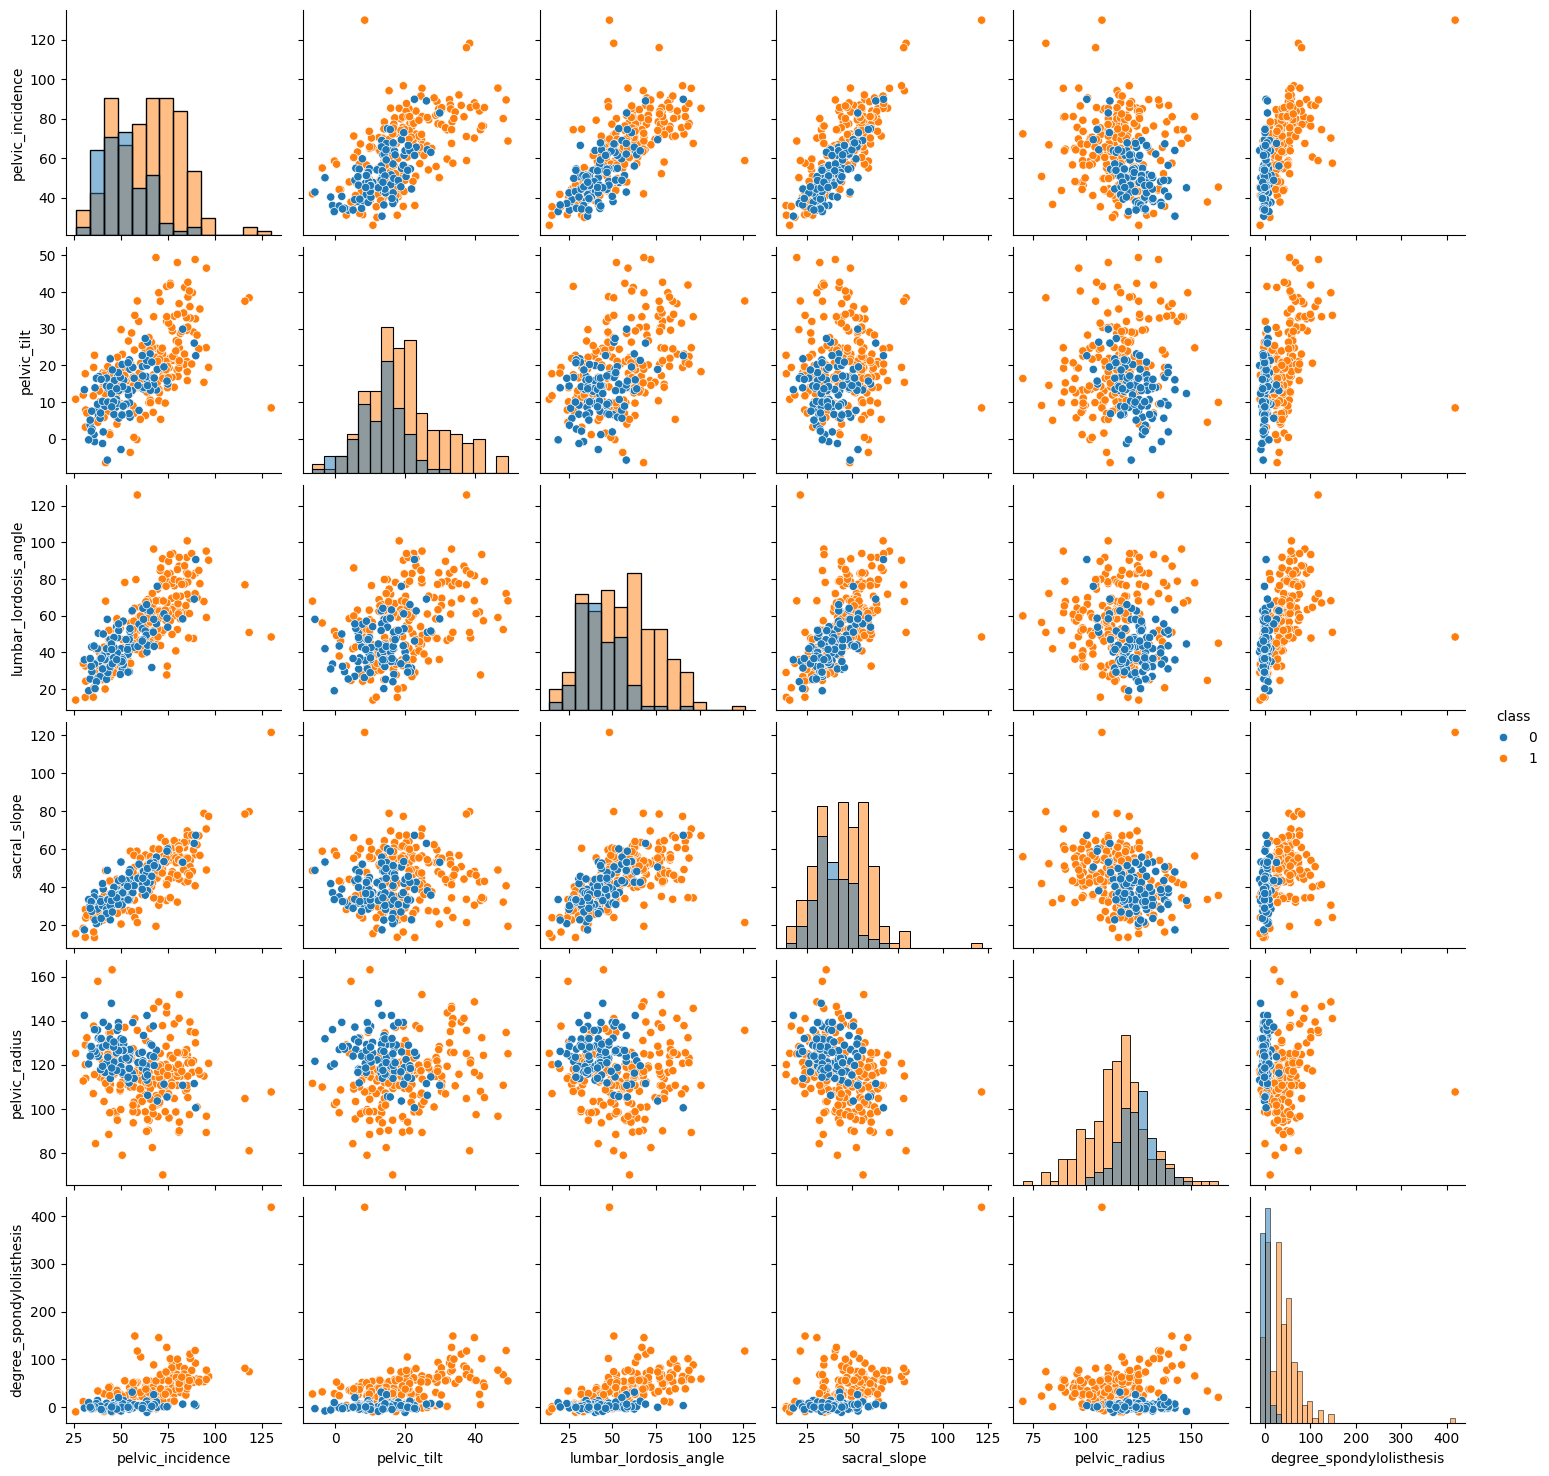

In [7]:
sns.pairplot(data, hue='class', diag_kind='hist')
plt.show()

#### ii. Boxplots

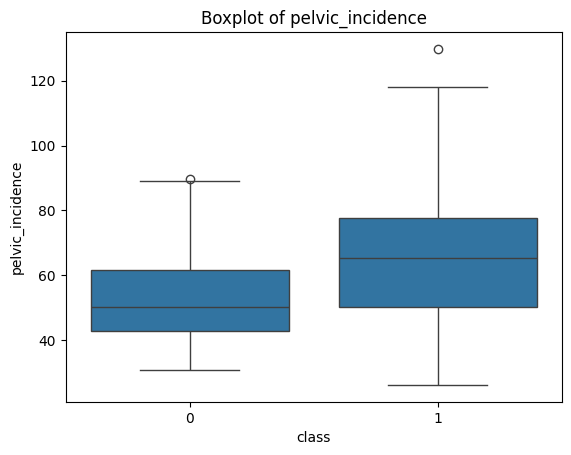

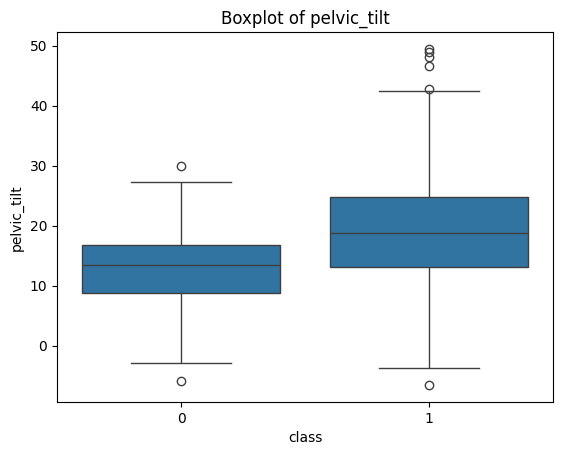

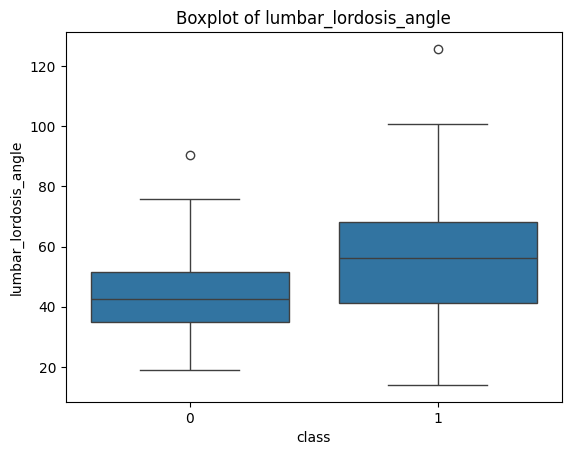

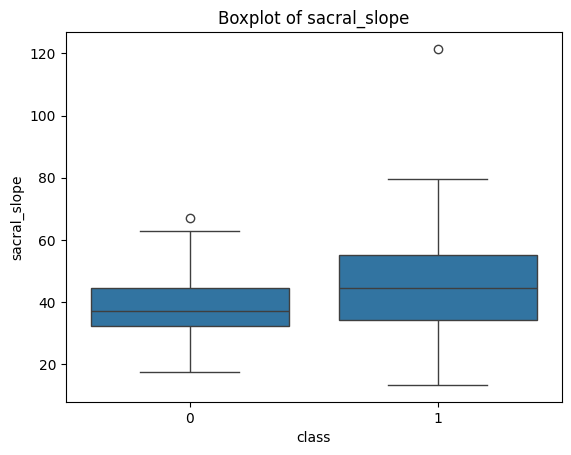

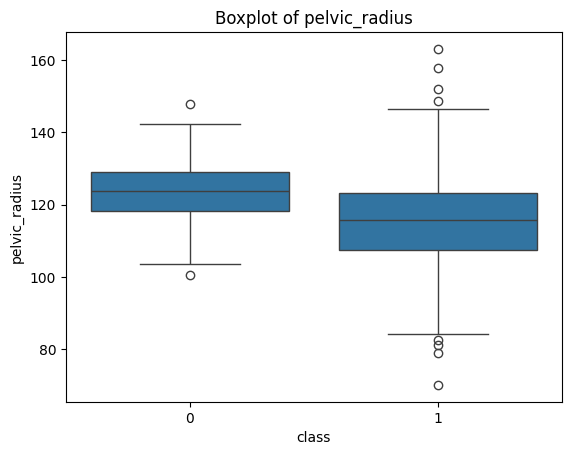

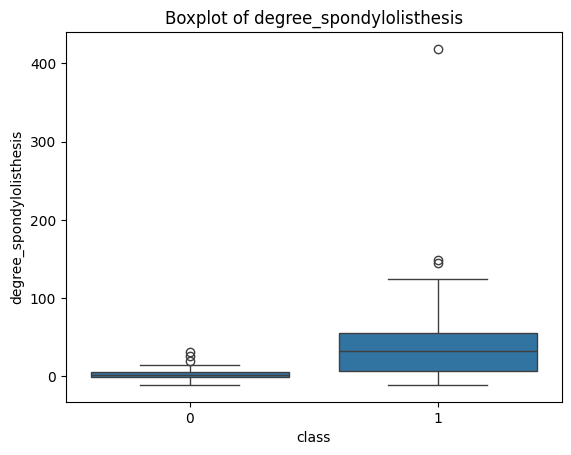

In [8]:
independent = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

for var in independent:
    sns.boxplot(x='class', y=var, data=data)
    plt.title(f'Boxplot of {var}')
    plt.show()

#### iii. Split Data Set

In [9]:
class0 = data[data['class'] == 0].iloc[:70, :]
class1 = data[data['class'] == 1].iloc[:140, :]

trainingData = pd.concat([class0, class1])

# Remaining data as test set
testingData = data.drop(trainingData.index)

### (c) Classification

#### i. Euclidean Metric

In [10]:
xTrain = np.array(trainingData[independent])
yTrain = np.array(trainingData['class'])

xTest = np.array(testingData[independent])
yTest = np.array(testingData['class'])

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

knn.fit(xTrain, yTrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

#### ii. Test Data

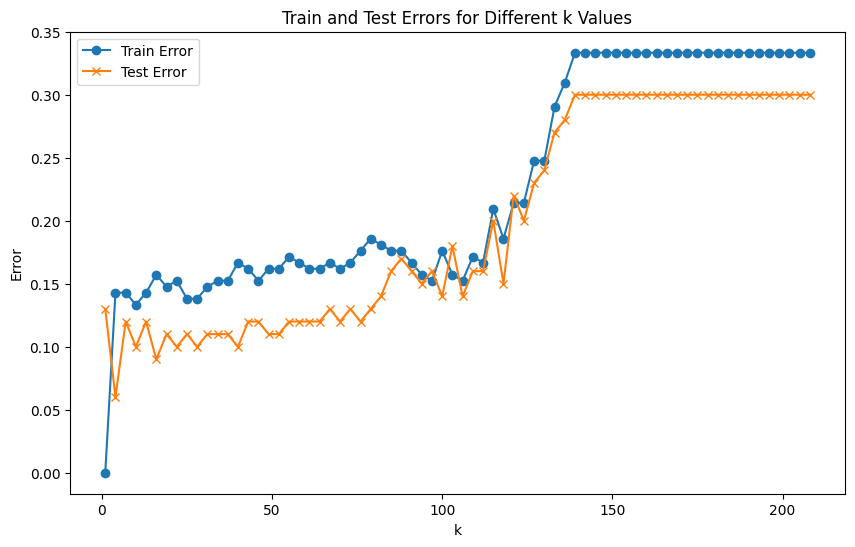

Test data:
The most suitable k is 4 with test error 0.06000000000000005.
Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1 Score: 0.9583333333333333


In [11]:
trainingErrors = []
testingErrors = []
kVals = list(range(208, 0, -3))

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(xTrain, yTrain)

    # Training
    yTrainPred = knn.predict(xTrain)
    trainingError = 1 - accuracy_score(yTrain, yTrainPred)
    trainingErrors.append(trainingError)
    
    # Test
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    testingErrors.append(testingError)

plt.figure(figsize=(10, 6))
plt.plot(kVals, trainingErrors, label='Train Error', marker='o')
plt.plot(kVals, testingErrors, label='Test Error', marker='x')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different k Values')
plt.legend()
plt.show()

minTestError = min(testingErrors)
optimalK = kVals[testingErrors.index(minTestError)]
print("Test data:")
print(f"The most suitable k is {optimalK} with test error {minTestError}.")

# Initialize the model with optimal k
knnOptimal = KNeighborsClassifier(n_neighbors=optimalK, metric='euclidean')

# Fit the model and make predictions
knnOptimal.fit(xTrain, yTrain)
yTestPred = knnOptimal.predict(xTest)

# Confusion Matrix
confMatrix = confusion_matrix(yTest, yTestPred)
print(f"Confusion Matrix:\n{confMatrix}")

# True Positive Rate
TPR = confMatrix[1, 1] / (confMatrix[1, 1] + confMatrix[1, 0])
print(f"True Positive Rate: {TPR}")

# True Negative Rate
TNR = confMatrix[0, 0] / (confMatrix[0, 0] + confMatrix[0, 1])
print(f"True Negative Rate: {TNR}")

# Precision
precision = precision_score(yTest, yTestPred)
print(f"Precision: {precision}")

# F1 Score
f1 = f1_score(yTest, yTestPred)
print(f"F1 Score: {f1}")

#### iii. Learning Curve

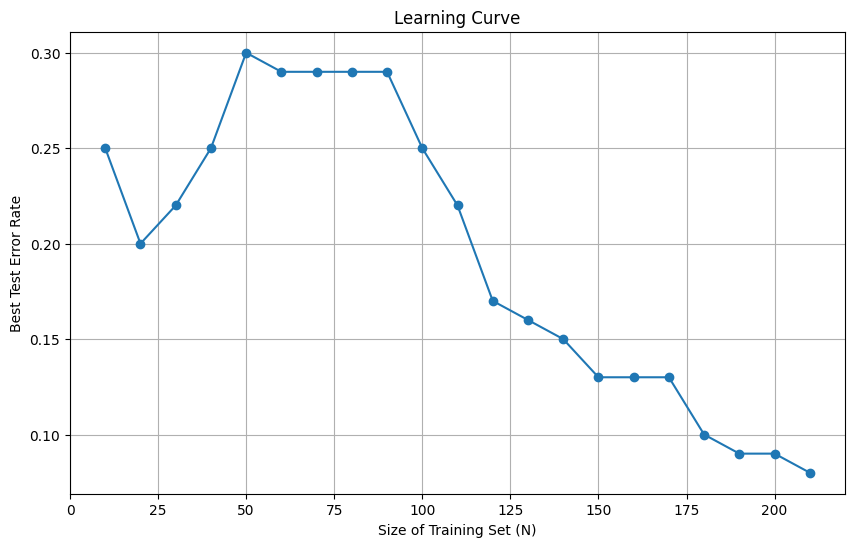

In [12]:
bestTestErrors = []

# For each N, 
for N in range(10, 211, 10):
    N0 = N // 3  # Rows from class 0
    N1 = N - N0  # Rows from class 1
    
    # Create training subset
    subset0 = class0.iloc[:N0, :]
    subset1 = class1.iloc[:N1, :]
    subsetTraining = pd.concat([subset0, subset1])
    
    xSubsetTrain = np.array(subsetTraining.drop(columns=['class']))
    ySubsetTrain = np.array(subsetTraining['class'])
    
    kVals = list(range(1, N+1, 5))
    subsetTestErrors = []
    
    # For each k, find test error
    for k in kVals:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(xSubsetTrain, ySubsetTrain)
        
        yTestPred = knn.predict(xTest)
        testingError = 1 - accuracy_score(yTest, yTestPred)
        subsetTestErrors.append(testingError)
        
    # Find the k that gives minimum test error
    minTestError = min(subsetTestErrors)
    bestTestErrors.append(minTestError)

plt.figure(figsize=(10, 6))
plt.plot(range(10, 211, 10), bestTestErrors, marker='o')
plt.xlabel('Size of Training Set (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [13]:
kVals = list(range(1, 197, 5))
testErrorManhattan = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(xTrain, yTrain)
    
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    testErrorManhattan.append(testingError)

minErrorManhattan = min(testErrorManhattan)
optimalWeightedManhattan = kVals[testErrorManhattan.index(minErrorManhattan)]

print(f"The most suitable k for Manhattan distance is {optimalWeightedManhattan} with test error {minErrorManhattan}.")


The most suitable k for Manhattan distance is 6 with test error 0.10999999999999999.


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [14]:
pVals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
pTestErrors = []

for logP in pVals:
    p = 10 ** logP
    knn = KNeighborsClassifier(n_neighbors=optimalWeightedManhattan, metric='minkowski', p=p)
    knn.fit(xTrain, yTrain)
    
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    pTestErrors.append(testingError)

minErrorP = min(pTestErrors)
optimalLogP = pVals[pTestErrors.index(minErrorP)]

print(f"The most suitable k for Manhattan distance is {optimalWeightedManhattan} with test error {minErrorManhattan}.")
print(f"The best log10(p) is {optimalLogP} with test error {minErrorP}.")

The most suitable k for Manhattan distance is 6 with test error 0.10999999999999999.
The best log10(p) is 0.6 with test error 0.06000000000000005.


##### C. Chebyshev Distance With p -> infinity.

In [15]:
chebyshevErrors = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(xTrain, yTrain)
    
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    chebyshevErrors.append(testingError)

minWeightedChebyshev = min(chebyshevErrors)
optimalChebyshev = kVals[chebyshevErrors.index(minWeightedChebyshev)]

print(f"The most suitable k for Manhattan distance is {optimalWeightedManhattan} with test error {minErrorManhattan}.")
print(f"The best log10(p) is {optimalLogP} with test error {minErrorP}.")
print(f"The most suitable k for Chebyshev distance is {optimalChebyshev} with test error {minWeightedChebyshev}.")


The most suitable k for Manhattan distance is 6 with test error 0.10999999999999999.
The best log10(p) is 0.6 with test error 0.06000000000000005.
The most suitable k for Chebyshev distance is 16 with test error 0.07999999999999996.


#### ii. Mahalanobis Distance.

In [16]:
# Find inverse covariance matrix
covMatrix = np.cov(xTrain, rowvar=False)
invCovMatrix = inv(covMatrix)

kVals = list(range(1, 197, 5))
mahalanobisErrors = []

# For each k, find test error with mahalanobis
for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='mahalanobis', metric_params={'VI': invCovMatrix})
    knn.fit(xTrain, yTrain)
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    mahalanobisErrors.append(testingError)

# Identify the optimal k
minMahalanobisError = min(mahalanobisErrors)
optimalMahalnobis = kVals[mahalanobisErrors.index(minMahalanobisError)]

print(f"The most suitable k for Manhattan distance is {optimalWeightedManhattan} with test error {minErrorManhattan}.")
print(f"The best log10(p) is {optimalLogP} with test error {minErrorP}.")
print(f"The most suitable k for Chebyshev distance is {optimalChebyshev} with test error {minWeightedChebyshev}.")
print(f"Optimal k for Mahalanobis Distance: {optimalMahalnobis}, Test Error: {minMahalanobisError}")

The most suitable k for Manhattan distance is 6 with test error 0.10999999999999999.
The best log10(p) is 0.6 with test error 0.06000000000000005.
The most suitable k for Chebyshev distance is 16 with test error 0.07999999999999996.
Optimal k for Mahalanobis Distance: 1, Test Error: 0.17000000000000004


### (e) Weighted Decision

In [17]:
kVals = list(range(1, 197, 5)) 

weightedEuclidean = []
manhattanWeighted = []
chebyshevWeighted = []

# For each k, find test error using weighted voting with different metrics
for k in kVals:
    # Euclidean
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn.fit(xTrain, yTrain)
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    weightedEuclidean.append(testingError)

    # Manhattan
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    knn.fit(xTrain, yTrain)
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    manhattanWeighted.append(testingError)

    # Chebyshev
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    knn.fit(xTrain, yTrain)
    yTestPred = knn.predict(xTest)
    testingError = 1 - accuracy_score(yTest, yTestPred)
    chebyshevWeighted.append(testingError)

# Find optimal k and min test error for each metric
minWeightedEuclidean = min(weightedEuclidean)
optimalWeightedEuclidean = kVals[weightedEuclidean.index(minWeightedEuclidean)]

minWeightedManhattan = min(manhattanWeighted)
optimalWeightedManhattan = kVals[manhattanWeighted.index(minWeightedManhattan)]

minWeightedChebyshev = min(chebyshevWeighted)
optimalWeightedChebyshev = kVals[chebyshevWeighted.index(minWeightedChebyshev)]

print(f"Euclidean Distance - Optimal k: {optimalWeightedEuclidean}, Minimum Test Error: {minWeightedEuclidean}")
print(f"Manhattan Distance - Optimal k: {optimalWeightedManhattan}, Minimum Test Error: {minWeightedManhattan}")
print(f"Chebyshev Distance - Optimal k: {optimalWeightedChebyshev}, Minimum Test Error: {minWeightedChebyshev}")

Euclidean Distance - Optimal k: 6, Minimum Test Error: 0.09999999999999998
Manhattan Distance - Optimal k: 26, Minimum Test Error: 0.09999999999999998
Chebyshev Distance - Optimal k: 16, Minimum Test Error: 0.10999999999999999


### (f) Training Error Rate

The lowest training error rate can be achieved when k = 1. This is because each data point is its own nearest neighbor in the training set, so the training error will be zero.